In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
%cd "/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1"
!ls

/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1
Data_augmentation_Coffe.ipynb  images


# Data Augmentation

usamos ImageDataGenerator para generar imagenes nuevas en el ram mientras entrenamos para no desperdiciar espacio.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


path = "/content/drive/MyDrive/Universidad 8vo semestre/Desarrollo de aplicaciones avanzadas de ciencias computacionales /M2/Actividad2.1"

base_dir = 'images'
train_dir = os.path.join(base_dir,'train')
test_dir = os.path.join(base_dir, 'test')

#Modificaciones de la imagen
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							rotation_range = 40,
							width_shift_range = 0.2,
							height_shift_range = 0.2,
							shear_range = 0.3,
							zoom_range = 0.3,
							horizontal_flip = True,)
							



En este caso estamos tomando 8 imágenes y estomos modificando todas 1 vez cada una y las mostramos a manera de ejemplo.

Found 282 images belonging to 2 classes.
(4, 150, 150, 3)
[0. 1. 1. 0.]


<Figure size 640x480 with 0 Axes>

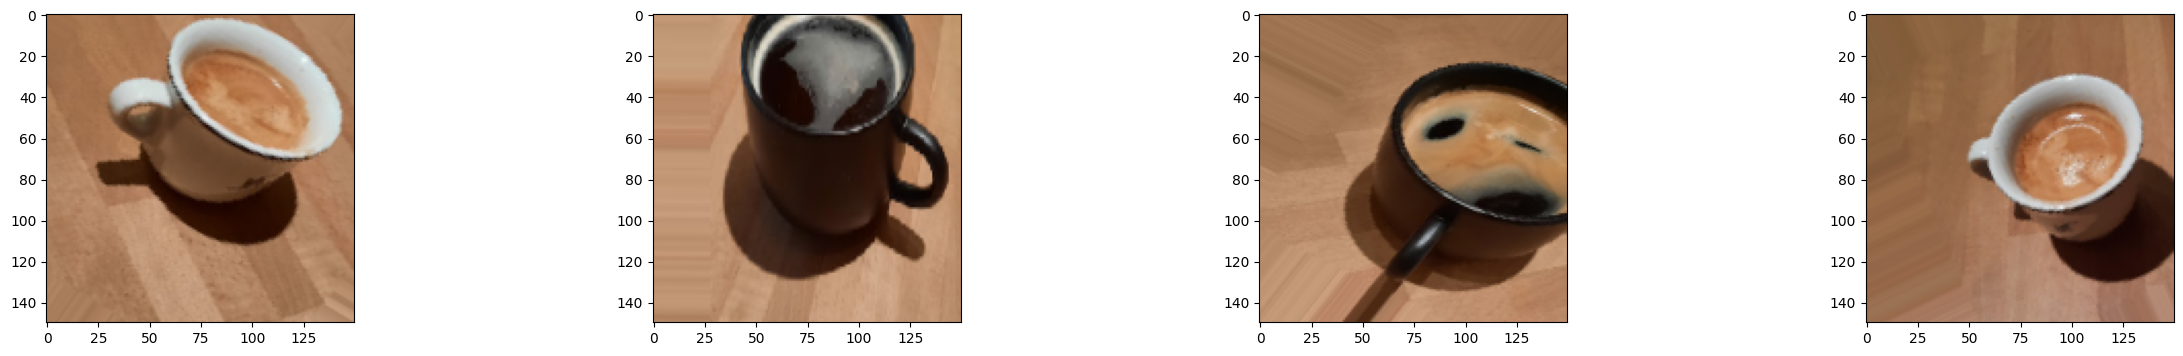

In [4]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 4, 
							class_mode ='binary',
							)


images , labels = train_generator[0]

print(images.shape)
print(labels)


plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4)) 

for i in range(images.shape[0]) :  
  axarr[i].imshow(images[i])

También podemos configurar la generación de imágenes para que cada una se salve en el disco duro, de esta forma podemos ver posteriormente con qué imágenes entrenó el modelo. 

In [5]:
train_generator = train_datagen.flow_from_directory(
							train_dir,
							target_size = (150, 150),
							batch_size = 4, #Imágenes 
							class_mode ='binary',
							save_to_dir= path + '/augmented',   
              save_prefix='aug',
              save_format='png'
							)

Found 282 images belonging to 2 classes.


Esta es una red neuronal convolutiva:

In [7]:
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
						
model = models.Sequential()
model.add(layers.Conv2D(10, (3, 3), activation="relu", input_shape = (150,150,3)))
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy',
						optimizer=optimizers.RMSprop(learning_rate=2e-5),
						metrics=['acc'])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 10)      280       
                                                                 
 flatten (Flatten)           (None, 219040)            0         
                                                                 
 dense_1 (Dense)             (None, 256)               56074496  
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 56,075,033
Trainable params: 56,075,033
Non-trainable params: 0
_________________________________________________________________


In [9]:

history = model.fit(
						train_generator, 
						epochs = 40)
				
			
acc = history.history['acc']
loss = history.history['loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs,acc,'bo',label='train accuracy')
plt.title('train acc')
plt.legend()

plt.figure()

plt.plot(epochs,loss, 'bo', label ='training loss')
plt.title('train loss')
plt.legend()

plt.show()

Epoch 1/40
71/71 [==============================] - 129s 2s/step - loss: 0.6822 - acc: 0.5780
Epoch 2/40
71/71 [==============================] - 119s 2s/step - loss: 0.6131 - acc: 0.6525
Epoch 3/40
71/71 [==============================] - 113s 2s/step - loss: 0.6057 - acc: 0.6560
Epoch 4/40
71/71 [==============================] - 114s 2s/step - loss: 0.5796 - acc: 0.7021
Epoch 5/40
71/71 [==============================] - 138s 2s/step - loss: 0.5541 - acc: 0.7199
Epoch 6/40
71/71 [==============================] - 131s 2s/step - loss: 0.5928 - acc: 0.6525
Epoch 7/40
71/71 [==============================] - 129s 2s/step - loss: 0.5568 - acc: 0.6667
Epoch 8/40
71/71 [==============================] - 130s 2s/step - loss: 0.5530 - acc: 0.7376
Epoch 9/40
71/71 [==============================] - 129s 2s/step - loss: 0.5496 - acc: 0.7305
Epoch 10/40
71/71 [==============================] - 138s 2s/step - loss: 0.5433 - acc: 0.7234
Epoch 11/40
71/71 [==============================] - 127s 2

KeyboardInterrupt: ignored

In [ ]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test_dir,
					target_size = (150, 150),
					batch_size = 20,
					class_mode= 'binary')

test_loss, test_acc = model.evaluate(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)


Found 10 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


 1/25 [>.............................] - ETA: 6s - loss: 125.6843 - acc: 0.6000

25/25 [==============================] - 0s 2ms/step - loss: 125.6843 - acc: 0.6000

test acc :
 0.6000000238418579
